In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_size = 128
batch_size = 32

In [4]:
data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [7]:
val_generator = val_datagen.flow_from_directory(
    data_dir + "/val",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # important for ROC
)

Found 624 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756556230.163095      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756556230.163864      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1756556250.161517     125 service.cc:148] XLA service 0x7fa5000043a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756556250.163016     125 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756556250.163044     125 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756556250.595391     125 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/163 ━━━━━━━━━━━━━━━━━━━━ 18:23 7s/step - accuracy: 0.6875 - loss: 0.6625

I0000 00:00:1756556254.255414     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 540ms/step - accuracy: 0.8033 - loss: 0.5944 - val_accuracy: 0.8125 - val_loss: 0.3065
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9538 - loss: 0.1352 - val_accuracy: 0.7500 - val_loss: 0.5891
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9661 - loss: 0.0955 - val_accuracy: 0.7500 - val_loss: 0.7254
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - accuracy: 0.9660 - loss: 0.0896 - val_accuracy: 0.8750 - val_loss: 0.3265
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9722 - loss: 0.0785 - val_accuracy: 0.8125 - val_loss: 0.3446
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9798 - loss: 0.0614 - val_accuracy: 0.7500 - val_loss: 0.5141
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 298ms/step - accuracy: 0.9825 - loss: 0.0506 - val_accuracy: 0.8750 - val_loss: 0.1800
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9894 - loss: 0.0287 - val

In [13]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_acc * 100, "%")
print("Test Loss:", test_loss)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - accuracy: 0.4617 - loss: 3.7033
Test Accuracy: 71.31410241127014 %
Test Loss: 2.011427164077759


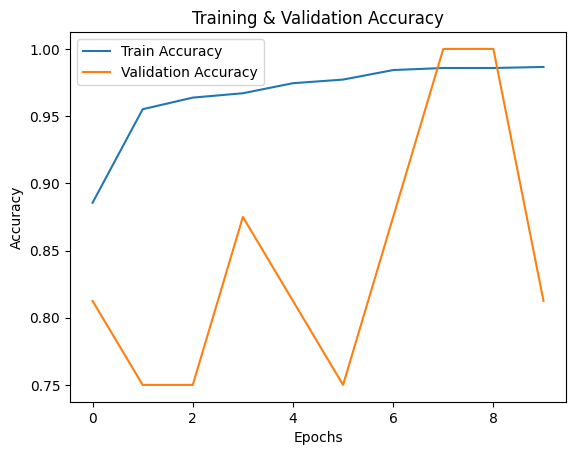

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

In [15]:
model.save("pneumonia_cnn.h5")